In [ ]:
pip install -r requirements.txt

In [7]:
import tensorflow as tf
from keras.layers import Dense, Conv2D
from keras.utils import image_dataset_from_directory
from keras import Sequential
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [ ]:
# drive.mount('/content/drive')

In [ ]:
# !unzip -uq "/content/drive/MyDrive/dataset/planetku/dataset.zip" -d "/content/drive/MyDrive/dataset/planetku/planetku"

In [ ]:
# PATH = 'drive/MyDrive/dataset/planetku/planetku'
TRAIN_PATH = '/kaggle/input/dataset/train'
VAL_PATH = '/kaggle/input/dataset/val'
TRAIN_DEST_PATH = '/kaggle/working/converted_train'
VAL_DEST_PATH = '/kaggle/working/converted_val'

In [ ]:
from PIL import Image
import glob
import os



# Create destination directory if it doesn't exist
os.makedirs(TRAIN_DEST_PATH, exist_ok=True)

# Iterate through all files and subdirectories in the dataset path
for img_path in glob.glob(os.path.join(TRAIN_PATH, "*", "*")):  # This will enter each class folder
    if os.path.isfile(img_path):  # Check if it's a file (not a directory)
        try:
            # Open the image and convert to RGB
            with Image.open(img_path) as img:
                # Generate a destination path within the writable directory
                subfolder = os.path.basename(os.path.dirname(img_path))
                dest_subfolder = os.path.join(TRAIN_DEST_PATH, subfolder)
                os.makedirs(dest_subfolder, exist_ok=True)

                # Save the converted image
                dest_path = os.path.join(dest_subfolder, os.path.basename(img_path))
                img.convert("RGB").save(dest_path, "JPEG")

        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    else:
        print(f"Skipped directory: {img_path}")


In [ ]:
from PIL import Image
import glob
import os



# Create destination directory if it doesn't exist
os.makedirs(VAL_DEST_PATH, exist_ok=True)

# Iterate through all files and subdirectories in the dataset path
for img_path in glob.glob(os.path.join(TRAIN_PATH, "*", "*")):  # This will enter each class folder
    if os.path.isfile(img_path):  # Check if it's a file (not a directory)
        try:
            # Open the image and convert to RGB
            with Image.open(img_path) as img:
                # Generate a destination path within the writable directory
                subfolder = os.path.basename(os.path.dirname(img_path))
                dest_subfolder = os.path.join(VAL_DEST_PATH, subfolder)
                os.makedirs(dest_subfolder, exist_ok=True)

                # Save the converted image
                dest_path = os.path.join(dest_subfolder, os.path.basename(img_path))
                img.convert("RGB").save(dest_path, "JPEG")

        except Exception as e:
            print(f"Error converting {img_path}: {e}")
    else:
        print(f"Skipped directory: {img_path}")


In [ ]:
# TRAIN_DEST_PATH = '/kaggle/working/converted_images'
# training_dataset, validation_dataset = image_dataset_from_directory(

#         directory=TRAIN_DEST_PATH,

#         image_size=(150, 150),

#         batch_size=128,

#         label_mode='categorical',

#         validation_split=0.1,

#         subset='both',

#         seed=42,

#         interpolation='nearest'

#     )

Found 8474 files belonging to 10 classes.
Using 7627 files for training.
Using 847 files for validation.


In [ ]:
IMG_SIZE = (150, 150)  # Ukuran input gambar untuk ResNet50
NUM_CLASSES = 10  # Jumlah kelas yang ingin diklasifikasi
BATCH_SIZE = 128
EPOCHS = 100

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DEST_PATH, 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    VAL_DEST_PATH, 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)



Found 8473 images belonging to 10 classes.
Found 8473 images belonging to 10 classes.


In [ ]:
# data_augmentation = Sequential([

#     tf.keras.layers.Input(shape=(150, 150, 3)),

#     tf.keras.layers.RandomFlip('horizontal'),

#     tf.keras.layers.RandomRotation(0.4),

# ])



# training_dataset = training_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# len(train_generator.class_names)

In [ ]:
pre_trained_model = tf.keras.applications.ResNet50V2(

    include_top=False,

    input_shape=(150, 150, 3),

)



pre_trained_model.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 38, 38,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 40, 40,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 38, 38,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):

        if logs['accuracy']>=0.99 and logs['val_accuracy'] > 0.95:

            self.model.stop_training = True

            print("\nReached 95% accuracy so cancelling training!")

In [ ]:
# try:

#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Automatically detects TPU

#     tf.config.experimental_connect_to_cluster(tpu)

#     tf.tpu.experimental.initialize_tpu_system(tpu)

#     strategy = tf.distribute.TPUStrategy(tpu)

#     print("TPU connected successfully")

# except ValueError:

#     print("No TPU found. Please enable TPU in Runtime > Change runtime type.")

In [ ]:
# combined_model = tf.keras.Sequential([

#     data_augmentation,

#     pre_trained_model  # Pre-trained model loaded here

# ])



# # Extract output from the pre-trained model (assuming it's the last layer)

# last_output = combined_model.layers[-1].output

In [ ]:
# with strategy.scope():

last_output = pre_trained_model.output

x = tf.keras.layers.Flatten()(last_output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(10, activation='softmax')(x)



# Define the model with input and output layers specified

model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)



# Compile the model

model.compile(

    optimizer='Adam',

    loss='categorical_crossentropy',

    metrics=['accuracy']

)

In [ ]:
# model = tf.keras.models.Sequential([

#         tf.keras.Input(shape=(150, 150, 3)),

#         tf.keras.layers.Rescaling(1./255),

#         tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

#         tf.keras.layers.MaxPool2D(2, 2),

#         tf.keras.layers.Flatten(),



#         tf.keras.layers.Dense(512, activation='relu'),

#         tf.keras.layers.Dense(10, activation='sigmoid')

#     ])





# model.compile(

#         optimizer='Adam',

#         loss='categorical_crossentropy',

#         metrics=['accuracy']

# 	)

In [ ]:
history = model.fit(

    train_generator,

    validation_data = val_generator,

    epochs=100,

    verbose=2,

    callbacks = [EarlyStoppingCallback()]

)

Epoch 1/100
67/67 - 81s - 1s/step - accuracy: 0.6815 - loss: 3.9863 - val_accuracy: 0.8554 - val_loss: 0.4650
Epoch 2/100
67/67 - 64s - 961ms/step - accuracy: 0.8270 - loss: 0.5446 - val_accuracy: 0.8902 - val_loss: 0.3296
Epoch 3/100
67/67 - 65s - 976ms/step - accuracy: 0.8633 - loss: 0.4188 - val_accuracy: 0.9194 - val_loss: 0.2449
Epoch 4/100
67/67 - 65s - 970ms/step - accuracy: 0.8806 - loss: 0.3665 - val_accuracy: 0.9331 - val_loss: 0.1897
Epoch 5/100
67/67 - 65s - 973ms/step - accuracy: 0.8981 - loss: 0.3056 - val_accuracy: 0.9540 - val_loss: 0.1423
Epoch 6/100
67/67 - 65s - 976ms/step - accuracy: 0.9168 - loss: 0.2540 - val_accuracy: 0.9572 - val_loss: 0.1286
Epoch 7/100
67/67 - 65s - 974ms/step - accuracy: 0.9264 - loss: 0.2261 - val_accuracy: 0.9714 - val_loss: 0.0921
Epoch 8/100
67/67 - 65s - 969ms/step - accuracy: 0.9324 - loss: 0.2127 - val_accuracy: 0.9700 - val_loss: 0.0891
Epoch 9/100
67/67 - 64s - 954ms/step - accuracy: 0.9432 - loss: 0.1803 - val_accuracy: 0.9675 - val

In [ ]:
# import os

# from PIL import Image



# def remove_non_images(directory):

#     for root, _, files in os.walk(directory):

#         for file in files:

#             file_path = os.path.join(root, file)

#             try:

#                 # Try to open the file as an image

#                 img = Image.open(file_path)

#                 img.verify()  # Check if it's a valid image

#             except (IOError, SyntaxError):

#                 # If not a valid image, delete the file

#                 print(f"Removing invalid image file: {file_path}")

#                 os.remove(file_path)



# # Run the function on your dataset directory

# remove_non_images(PATH)

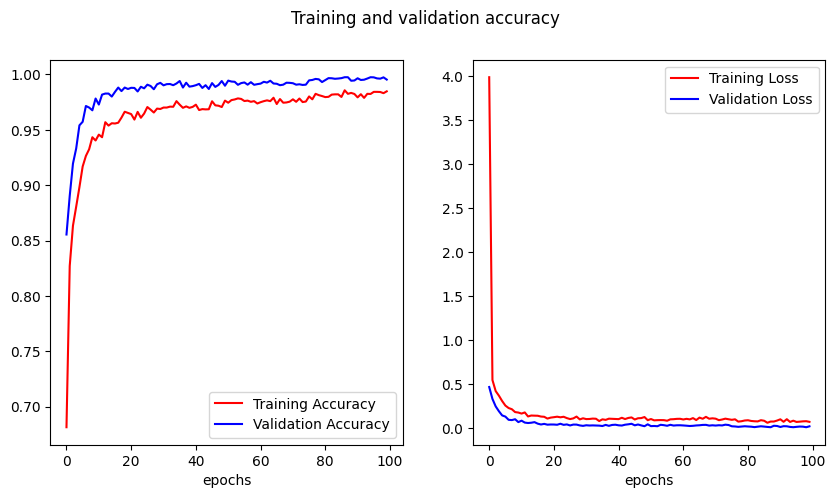

In [ ]:
# Get training and validation accuracies

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



# Get number of epochs

epochs = range(len(acc))



fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Training and validation accuracy')



for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):

    ax[i].plot(epochs, data[0], 'r', label="Training " + label)

    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)

    ax[i].legend()

    ax[i].set_xlabel('epochs')



plt.show()

In [ ]:
model.save("model98.h5")

In [ ]:
model2 = model = tf.keras.models.load_model('/kaggle/working/model98.h5')

In [ ]:
class_names  = ['battery', 'cardboard', 'clothes', 'glass', 'metal', 'organic', 'paper', 'plastic', 'shoes', 'styrofoam']

In [ ]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
def predict_image_from_url(url):

    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((150, 150))
    
   
    img_array = np.array(img) / 255.0
    
   
    img_array = np.expand_dims(img_array, axis=0)
    
   
    predictions = model2.predict(img_array)
    
    
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class]
    confidence = predictions[0][predicted_class]
    
    return predicted_class_name, confidence

In [ ]:
url = 'https://cdn-brilio-net.akamaized.net/webp/news/2022/12/20/244361/1200xauto-cara-simpel-membuang-pecahan-kaca-ke-tong-sampah-bikin-tangan-terhindar-dari-luka-2212205.jpg'
predicted_class, confidence = predict_image_from_url(url)
print(f'Predicted class: {predicted_class} with confidence {confidence:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: glass with confidence 0.99


In [ ]:
# Parameter untuk papermill
try:
    image_path
except NameError:
    image_path = "test_image.jpg"

# Muat gambar
from PIL import Image
import numpy as np

img = Image.open(image_path)
img = img.resize((150, 150))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
confidence = predictions[0][predicted_class]

# Tampilkan hasil
print(f"Predicted Class: {predicted_class}, Confidence: {confidence}")